In [48]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn


In [27]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [28]:
len(X_train)

60000

In [29]:
X_train[0].shape

(28, 28)

In [30]:
X_train=X_train/255
X_test=X_test/255

In [31]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

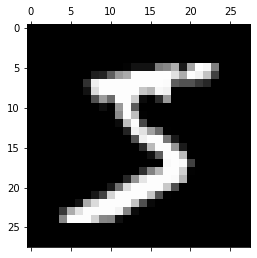

In [32]:
plt.matshow(X_train[0])
plt.gray()

In [33]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)
X_train_flattened.shape,X_test_flattened.shape

((60000, 784), (10000, 784))

In [34]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [35]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4626 - accuracy: 0.8796
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3036 - accuracy: 0.9151
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2833 - accuracy: 0.9202
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2730 - accuracy: 0.9242
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2666 - accuracy: 0.9256
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2617 - accuracy: 0.9270
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2581 - accuracy: 0.9282
Epoch 8/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2554 - accuracy: 0.9295
Epoch 9/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2529 - accuracy: 0.9305
Epoch 10/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.251

In [36]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 978us/step - loss: 0.2674 - accuracy: 0.9290


[0.26735132932662964, 0.9290000200271606]

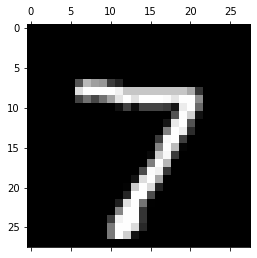

In [39]:
plt.matshow(X_test[0])

In [42]:
y_predicted=model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 912us/step


array([3.2203377e-04, 4.5504192e-10, 1.8523644e-03, 9.6560705e-01,
       1.2000890e-03, 1.2669241e-01, 3.9045003e-10, 9.9989784e-01,
       6.7623369e-02, 6.8512607e-01], dtype=float32)

In [44]:
np.argmax(y_predicted[0])

7

In [45]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [46]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [47]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    0,    2,    1,    6,    4,    3,    1,    0],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   6,    9,  926,   17,   10,    3,   11,   10,   37,    3],
       [   2,    0,   17,  932,    1,   17,    2,   10,   23,    6],
       [   1,    1,    5,    3,  934,    0,    5,    4,    8,   21],
       [   8,    3,    1,   41,   10,  769,   15,    9,   33,    3],
       [  13,    3,    8,    1,    8,   12,  910,    1,    2,    0],
       [   1,    7,   23,    5,    8,    1,    0,  952,    2,   29],
       [   7,   10,    5,   23,    9,   22,    6,   11,  873,    8],
       [  10,    8,    1,   10,   32,    6,    0,   22,    6,  914]])>

Text(69.0, 0.5, 'Truth')

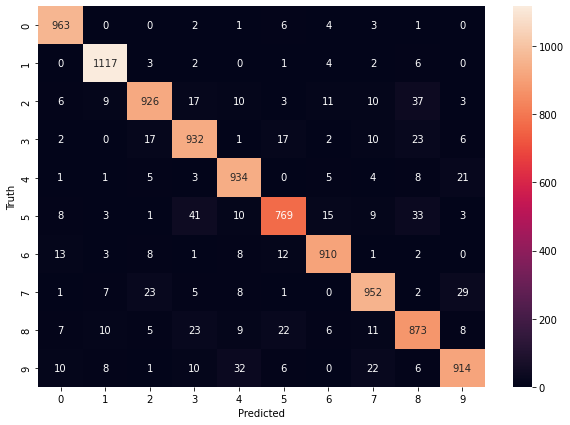

In [49]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [50]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2817 - accuracy: 0.9200
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1300 - accuracy: 0.9621
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0916 - accuracy: 0.9730
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0693 - accuracy: 0.9792
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0552 - accuracy: 0.9834
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0444 - accuracy: 0.9863
Epoch 7/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0361 - accuracy: 0.9888
Epoch 8/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0288 - accuracy: 0.9910
Epoch 9/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0248 - accuracy: 0.9923
Epoch 10/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.019

In [51]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1023 - accuracy: 0.9770


[0.1022937223315239, 0.9769999980926514]

313/313 [==============================] - 0s 1ms/step


Text(69.0, 0.5, 'Truth')

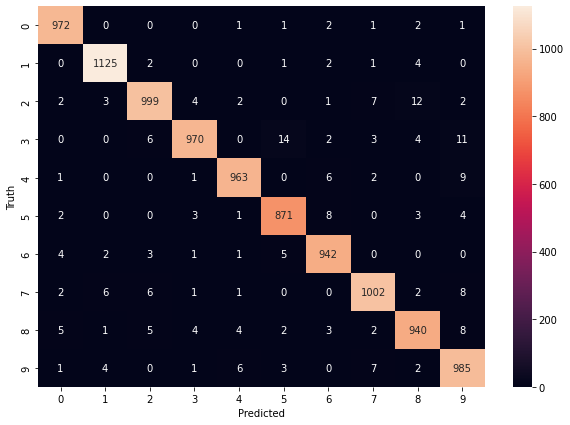

In [53]:
y_predicted=model.predict(X_test_flattened)
y_predicted_labels=[np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [55]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2718 - accuracy: 0.9230
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1245 - accuracy: 0.9630
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0871 - accuracy: 0.9735
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0669 - accuracy: 0.9792
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0528 - accuracy: 0.9840


In [ ]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=5)